In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.covariance import MinCovDet
from sklearn import tree
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('bank_new.csv')
df.head()

str_col = ['job','marital','education','default','housing','loan','contact','month']

dummied_df = pd.get_dummies(df[str_col], drop_first=True)
dummied_df.head(3)

num_df = df.drop(columns=str_col)
df2 = pd.concat([num_df,dummied_df,df[str_col]], axis=1)
df2.head()

train_val, test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

train_val.isnull().sum()

train_val.corr(numeric_only=True)['duration'].map(abs).sort_values(ascending=False)

duration                     1.000000
housing_yes                  0.556899
loan_yes                     0.372579
y                            0.277575
age                          0.207738
month_aug                    0.187310
month_may                    0.184593
marital_single               0.164614
previous                     0.143538
marital_married              0.115429
job_student                  0.107913
contact_sending _document    0.087863
education_tertiary           0.081769
job_blue-collar              0.080727
month_jun                    0.065998
month_oct                    0.052855
job_unknown                  0.046328
job_management               0.045735
job_unemployed               0.044179
month_mar                    0.043775
job_housemaid                0.039184
education_secondary          0.033989
job_retired                  0.033277
month_sep                    0.032082
amount                       0.030532
day                          0.023779
job_services

<Axes: >

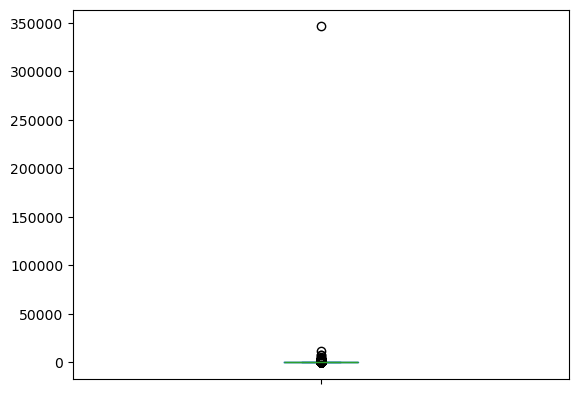

In [2]:
lr_df = train_val.drop(columns=str_col).drop(columns='id')
lr_train_df = lr_df.dropna()

mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(lr_train_df)

distance = pd.Series(mcd.mahalanobis(lr_train_df))
distance.plot(kind='box')

In [3]:
no = distance[distance>300000].index
no[0]

2561

In [4]:
lr_train_df

,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
13378,46,0,10,378.293875,1,0,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3800,41,-333,30,300.845752,3,2,0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
10398,30,5389,6,159.053623,3,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23401,39,255,5,334.802583,1,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
25158,52,556,13,231.375776,6,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25725,45,14,18,315.275502,9,5,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9979,59,3694,5,395.617358,10,0,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
22584,33,-208,4,424.191814,3,1,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
501,55,4746,23,404.106909,3,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [5]:
no = lr_train_df.iloc[no[0]:(no[0]+1),:]
no

,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3140,40,543,2,1435.48804,2,275,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [6]:
def learn(x,y,i):
    x_train, x_val, y_train, y_val = train_test_split(x,y,random_state=13,test_size=0.2)
    datas = [x_train, x_val, y_train, y_val]
    model = tree.DecisionTreeClassifier(max_depth=i, random_state=0, class_weight='balanced')
    model.fit(x_train, y_train)
    sc1 = model.score(x_train, y_train)
    sc2 = model.score(x_val, y_val)
    return sc1,sc2,model,datas

In [7]:
lr_train_df = lr_train_df.drop(index=no.index)

In [8]:
lr_col = ['housing_yes','loan_yes','age','marital_single','previous']
x = lr_train_df[lr_col]
y = lr_train_df['duration']

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.732676791500336

In [10]:
pred_df = lr_df.loc[lr_df['duration'].isnull(),lr_col]
pred = lr.predict(pred_df)
lr_df.loc[lr_df['duration'].isnull(),'duration'] = pred
train_val2 = lr_df

<Axes: ylabel='Frequency'>

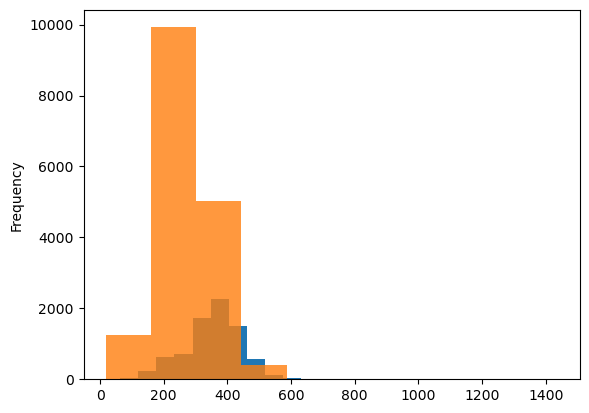

In [11]:
train_val2.loc[train_val2['y']==1, 'duration'].plot(kind='hist')
train_val2.loc[train_val2['y']==0, 'duration'].plot(kind='hist', alpha=0.8)

In [12]:
x = train_val2.drop(['day','y'], axis=1)
y = train_val2[['y']]

In [13]:
for i in range(1,20):
    sc1, sc2, model, datas = learn(x,y,i)
    print(i,sc1,sc2)

1 0.7466209297562973 0.7476960884702027
2 0.7466209297562973 0.7476960884702027
3 0.7423202949006759 0.7442146221585091
4 0.7423202949006759 0.7442146221585091
5 0.7608027851730493 0.7571165267253738
6 0.7463137415523244 0.7376612738070858
7 0.7797460577513824 0.7673561335244726
8 0.806010649191071 0.7839442965390129
9 0.8176838009420438 0.7882449313946345
10 0.8414396887159533 0.7978701617857874
11 0.8549559696907639 0.791726397706328
12 0.8697010034814663 0.7892688920745443
13 0.8855211959860741 0.7843538808109769
14 0.9012901904566865 0.7792340774114274
15 0.915523243907434 0.7804628302273193
16 0.9296539012901904 0.7804628302273193
17 0.942965390129019 0.7773909481875896
18 0.9513106696702847 0.7747286504198239
19 0.962113454843334 0.7778005324595536


In [14]:
sc1, sc2, model, datas = learn(x,y,9)

In [16]:
import pandas as pd

# datas = [x_train, x_val, y_train, y_val]
def syukei(model, datas, flag=False):
    if flag:
        pre = model.predict(datas[0]).flatten()  # 予測値を一次元に変換
        y_val = datas[2].values.flatten()  # 実際の値を一次元に変換
    else:
        pre = model.predict(datas[1]).flatten()  # 予測値を一次元に変換
        y_val = datas[3].values.flatten()  # 実際の値を一次元に変換
    
    print(pre)
    print(y_val)
    
    data = {
        'pred': pre,
        'true': y_val
    }
    tmp = pd.DataFrame(data)
    return tmp, pd.pivot_table(tmp, index='true', columns='pred', values='true', aggfunc=len)

# syukei 関数の呼び出し
tmp, a = syukei(model, datas, False)
print(a)


[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 0]
pred     0     1
true            
0     2628   755
1      279  1221


In [15]:
test2 = test.copy()
is_null = test2['duration'].isnull()
test_train_df = test2.dropna()
lr = LinearRegression()
lr.fit(test_train_df[lr_col],test_train_df['duration'])
test2.loc[is_null,'duration'] = lr.predict(test2.loc[is_null,lr_col])
x_test = test2.drop(['day','y','id'], axis=1)
x_test = x_test.drop(columns=str_col)
y_test = test2[['y']]
model.score(x_test,y_test)

0.7755252488020641

In [ ]:
sc = StandardScaler()
tmp2 =  train_val2
sc_data = sc.fit_transform(tmp2)
sc_df = pd.DataFrame(sc_data, columns=tmp2.columns, index=tmp2.index)
pre = model.predict(sc_df.drop(['day','y'], axis=1))
target = tmp2['y']
true = (pre==target)
false = (pre!=target)
true_df = sc_df.loc[true]
false_df = sc_df.loc[false]
temp2 = pd.concat([true_df, false_df], axis=1)
temp2.plot(kind='bar')

In [ ]:
print(train_val2.groupby('loan')['y'].mean())
print(train_val2.groupby('housing')['y'].mean())


In [ ]:
train_val3 = train_val2.copy()
train_val3['du*hou'] = train_val3['duration']*train_val3['housing_yes']
train_val3['du*loan'] = train_val3['duration']*train_val3['loan_yes']
train_val3['du*age'] = train_val3['duration']*train_val3['age']


In [ ]:
t = train_val3['y']
monthcol = ['month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']
jobcol=['job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown']
x = x.drop(jobcol, axis=1)
x = x.drop(monthcol, axis=1)
x = x.drop(['id','y','during',])


In [ ]:
for i in range(5,15):
    s1,s2,datas,model = learn(x,t,i)
    print(i,s1,s2)

In [ ]:
s1, s2, datas, model = learn(x,t,9)
tmp, a = syukei(model, datas, False)
a

In [ ]:
pd.Series(model.feature_importances_, index=x.columns)


In [ ]:
i=9
model = tree.DecisionTreeClassifier(random_state=i, max_deptj=i, class_weight='balanced')
model.fit(x,t)

In [ ]:
test2 = test.copy()
isnull = test['duration'].isnull()
if isnull.sum()>0:
    temp_x = test2.loc[isnull,['housing_yes','loan_yes','age','marital_single','job_student']]
    pred_d = model_linear.predict(temp_x)
    test2.loc[isnull,'duration'] = pred_d
test2['du*hou'] = test2['duration']*test2['housing_yes']
test2['du*loan'] = test2['duration']*test2['loan_yes']
test2['du*age'] = test2['duration']*test2['age']
x_test = test2.drop(columns=['y','id','day'])
x_test = x_test.drop(monthcol, axis=1)
x_test = x_test.drop(jobcol, axis=1)